# Homework #1 Solution

# Problem 1: Other activation functions (20%)
### The leaky Relu is defined as $max(0.1x, x)$. 
 - What is its derivative? (Please express in "easy" format")
 - Is it suitable for back propagation?
 
### $tanh$ is defined as  $\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$. 
 - What is its derivative? (Please express in "easy" format")
 - Is it suitable for back propagation?
 - How is it different from the sigmoid activation

#### (1) Leaky Relu

- $f(x)=max(0.1x,x)$

\begin{equation}
f'(x)=\left\{
             \begin{array}{lr}
             1, &  x> 0\\
             0.1, &  otherwise
             \end{array}
\right.
\end{equation}

__Is it suitable for back propagation?__
<br>Yes

#### (2) Tanh (x)
__The derivative of $\tanh(x)$ is__ $$\dfrac{d\tanh (x)}{dx} = \dfrac{4}{(e^x + e^{-x})^2} = \textrm{sech}^2(x) = 1-\tanh^2(x).$$

__Is it suitable for back propagation?__
<br>Yes

__How is it different from the sigmoid activation?__
<br>Like the logistic sigmoid, the tanh function is also sigmoidal (“s”-shaped), but instead outputs
values that range (-1, 1). Thus strongly negative inputs to the tanh will map to negative outputs.
Additionally, only zero-valued inputs are mapped to near-zero outputs. These properties make
the network less likely to get “stuck” during training.

# Problem 2: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# many of these imports to be removed
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import RMSprop
import keras.backend as K

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = .05

num_variables = coefs.shape[0]

x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)

cutoff = int(.8 * num_observations)
x_train, x_test = x[:cutoff], x[cutoff:]
y_train, y_test = y[:cutoff], y[cutoff:]

In [3]:
x_train.shape, y_train.shape

((819, 7), (819,))

In [4]:

lin_reg = LinearRegression()  # to be removed
lin_reg.fit(x_train, y_train)  # to be removed
mean_squared_error(y_test, lin_reg.predict(x_test))  # to be removed

0.00020069709507880277

In [5]:
# Show that the coefficients are all close the the "real" ones used to generate the data
pd.Series(lin_reg.coef_, name='fit coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))  # to be removed

,fit coefficients,real coefficients
0,-1.200444,-1.20
1,5.004571,5.00
2,-0.002984,0.00
3,0.221053,0.22
4,2.002301,2.00
5,0.001647,0.00
6,4.001042,4.00


In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [7]:
# Now we will use keras to solve the same problem 
#input_data = Input(shape=FIXME)
# add model definition here

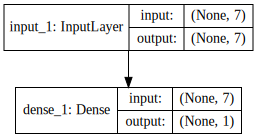

In [8]:
K.clear_session()

input_data = Input(shape=(x_train.shape[1],)) # to be removed
output = Dense(1, activation=None)(input_data)  # to be removed

keras_lin_reg = Model(input_data, output)   # to be removed
keras_lin_reg.compile(optimizer='rmsprop', loss='mse')  # to be removed
plot_model_in_notebook(keras_lin_reg)  # to be removed 

## How many parameters does the model have? 
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [9]:
# ADD CODE HERE

In [10]:
keras_lin_reg.fit(x_train, y_train, epochs=2048, verbose=0, batch_size=256, shuffle=True)  # to be removed
mean_squared_error(y_test, keras_lin_reg.predict(x_test))

0.0002370304527905543

In [11]:
layer = keras_lin_reg.layers[1]  # to be removed
keras_ols_coefs = pd.Series(layer.get_weights()[0].squeeze())  # to be removed

pd.Series(keras_ols_coefs, name='keras ols coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras ols coefficients,real coefficients
0,-1.202948,-1.20
1,5.004425,5.00
2,-0.004936,0.00
3,0.219746,0.22
4,2.001384,2.00
5,-0.000178,0.00
6,3.998092,4.00


## Now we will add some regularization

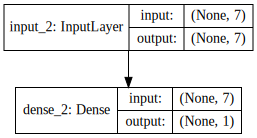

In [12]:
from keras.regularizers import l1_l2
regularizer = l1_l2(l1=0, l2=.1)
 # Dense(...) -> Dense(..., kernel_regularizer=regularizer)
    
input_data = Input(shape=(x_train.shape[1],))  # to be removed
output = Dense(1, activation=None,kernel_regularizer=regularizer)(input_data)  # to be removed
keras_ridge_model = Model(input_data, output)
keras_ridge_model.compile(optimizer='rmsprop', loss='mse')   # to be removed
plot_model_in_notebook(keras_ridge_model)  # to be removed

In [13]:
keras_ridge_model.fit(x_train, y_train, epochs=2048, verbose=0, batch_size=256, shuffle=True)  # to be removed
mean_squared_error(y_test, keras_ridge_model.predict(x_test))

1.152349838340634

In [14]:
layer = keras_ridge_model.layers[1]  # to be removed
keras_ridge_coefs = pd.Series(layer.get_weights()[0].squeeze())  # to be removed

pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras ridge coefficients,real coefficients
0,-0.576886,-1.20
1,2.272518,5.00
2,0.004011,0.00
3,0.229310,0.22
4,0.877679,2.00
5,-0.025914,0.00
6,1.749791,4.00


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(x_train, y_train)
pd.Series(ridge.coef_, name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,ridge coefficients,real coefficients
0,-0.521426,-1.20
1,2.023791,5.00
2,0.003291,0.00
3,0.212870,0.22
4,0.777631,2.00
5,-0.022105,0.00
6,1.555013,4.00


In [16]:
# compare coefficients from various methods
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(coefs, name='real coefs')
], axis=1)

,ridge coefs,keras L2 coefs,real coefs
0,-0.521426,-0.576886,-1.20
1,2.023791,2.272518,5.00
2,0.003291,0.004011,0.00
3,0.212870,0.229310,0.22
4,0.777631,0.877679,2.00
5,-0.022105,-0.025914,0.00
6,1.555013,1.749791,4.00


## In fact, given the zero coefficients, LASSO might have been a better model. 
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1)
lasso.fit(x_train, y_train)
pd.Series(lasso.coef_, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,lasso coefficients,real coefficients
0,-0.048288,-1.20
1,3.815515,5.00
2,0.000000,0.00
3,0.000000,0.22
4,0.746026,2.00
5,-0.000000,0.00
6,2.731789,4.00


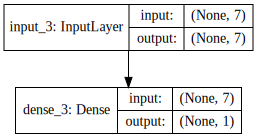

In [18]:
regularizer = l1_l2(l1=0.1, l2=0)  # to be removed

input_data = Input(shape=(x_train.shape[1],))  # to be removed
output = Dense(1, activation=None,kernel_regularizer=regularizer)(input_data)  # to be removed
keras_lasso_model = Model(input_data, output)  # to be removed
keras_lasso_model.compile(optimizer='rmsprop', loss='mse')  # to be removed
plot_model_in_notebook(keras_lasso_model)  # to be removed

In [19]:
keras_lasso_model.fit(x_train, y_train, epochs=2048, verbose=0, batch_size=256, shuffle=True)  # to be removed
keras_lasso_coefs = pd.Series(keras_lasso_model.layers[1].get_weights()[0].squeeze())

In [20]:
# compare all the coefficients
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(lasso.coef_, name='lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
    pd.Series(lin_reg.coef_, name='ols coefs'),
    pd.Series(coefs, name='real coefs'),
], axis=1)

,ridge coefs,keras L2 coefs,lasso coefs,keras L1 coefs,ols coefs,real coefs
0,-0.521426,-0.576886,-0.048288,-0.626887,-1.200444,-1.20
1,2.023791,2.272518,3.815515,4.408578,5.004571,5.00
2,0.003291,0.004011,0.000000,-0.001207,-0.002984,0.00
3,0.212870,0.229310,0.000000,0.000199,0.221053,0.22
4,0.777631,0.877679,0.746026,1.373684,2.002301,2.00
5,-0.022105,-0.025914,-0.000000,-0.001490,0.001647,0.00
6,1.555013,1.749791,2.731789,3.369270,4.001042,4.00


In [21]:
# TODO(find optimal regularization paramter) ?

# Problem 3: Keras for harder mnist problems (40%)
#### The deep net during lecture has a hard time distiguishing between 9 and 4.
#### We will build an algorithm to do this binary classification task 

In [22]:
# safe to restart here

In [23]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
from keras.datasets import mnist
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import RMSprop
import keras.backend as K

Populating the interactive namespace from numpy and matplotlib


In [24]:
from keras.utils import to_categorical

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    mask = (y == 9) | (y == 4)
    new_x = x[mask]
    new_y = (y[mask] == 4).astype('int64')
    return new_x, new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

train_frac = 0.8
cutoff = int(x_train.shape[0] * train_frac)
x_train, x_val = x_train[:cutoff], x_train[cutoff:]
y_train, y_val = y_train[:cutoff], y_train[cutoff:]
y_train_ohe, y_val_ohe = y_train_ohe[:cutoff], y_train_ohe[cutoff:]

x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_val, y_val = subset_to_9_and_4(x_val, y_val)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

print(x_train.shape)

(9457, 784)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_score(y_test, lr.predict(x_test))

0.9728779507785033

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [27]:
K.clear_session()
num_hidden_units = 256
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
x = Dense(num_hidden_units, activation='relu', name='dense_0')(digit_input)  # to be removed
x = Dropout(.2, name='dropout_0')(x)  # to be removed
for i in range(3):  # to be removed
    x = Dense(num_hidden_units, activation='relu', name='dense_{}'.format(i + 2))(x)  # to be removed
    x = Dropout(.2, name='dropout_{}'.format(i + 2))(x)  # to be removed

output = Dense(1, activation='sigmoid')(x)  # to be removed
model = Model(digit_input, output)  # to be removed

#NB: you probably want BINARY cross entropy i.e. 'binary_crossentropy' for the loss function
model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

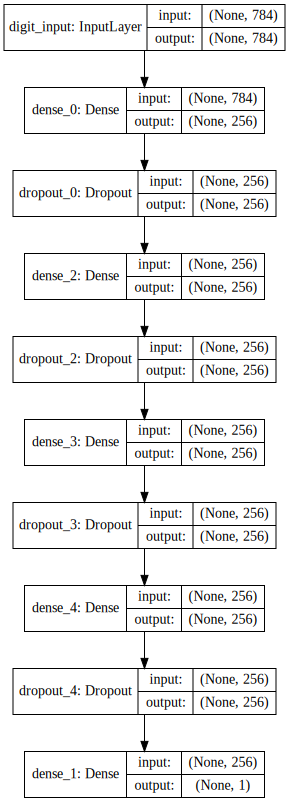

In [28]:
plot_model_in_notebook(model)

In [29]:
model.count_params()

398593

In [30]:
model.fit(x_train, y_train, batch_size=356, validation_data=(x_val, y_val), epochs=16, shuffle=True, verbose=0)

In [31]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test, model.predict(x_test)>0.5)

0.9884480160723255